In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\srira\Downloads\Airline\train.csv")

In [3]:
data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
del data["Unnamed: 0"]
del data["id"]


In [6]:
print(data.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


In [7]:
from sklearn.impute import SimpleImputer
imputer_int=SimpleImputer(missing_values=np.nan)
data['Arrival Delay in Minutes'] = imputer_int.fit_transform(data[['Arrival Delay in Minutes']])


In [8]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data["Gender"]=LE.fit_transform(data["Gender"])
data["Customer Type"]=LE.fit_transform(data["Customer Type"])
data["Type of Travel"]=LE.fit_transform(data["Type of Travel"])
data["Class"]=LE.fit_transform(data["Class"])
data["satisfaction"]=LE.fit_transform(data["satisfaction"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [11]:
IndepVar = []
for col in data.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x = data[IndepVar]
y = data[TargetVar]

In [12]:
x.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [13]:
corr = data.corr()

<AxesSubplot:>

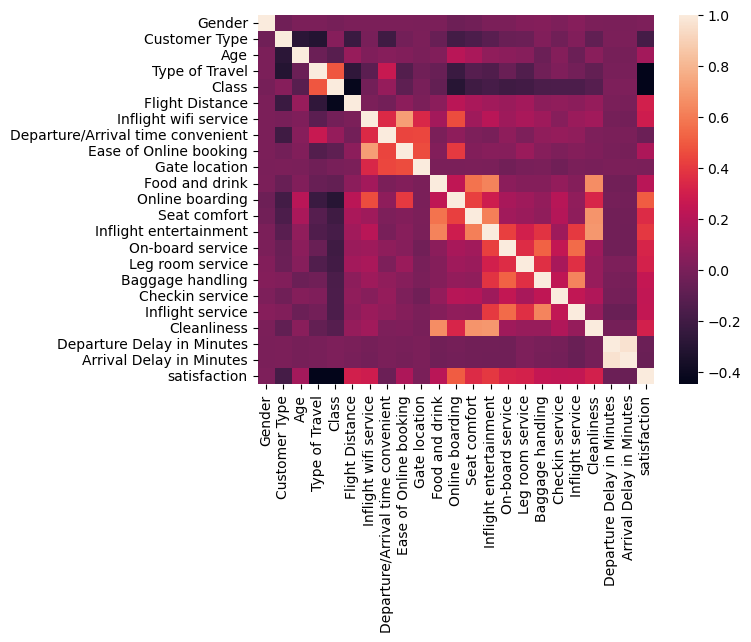

In [14]:
sns.heatmap(corr)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=0)


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform (x_test)

In [17]:
print(x_train.shape,x_test.shape)

(69615, 22) (34289, 22)


# Selecting Meaningful Features

In [45]:
from sklearn.feature_selection import SelectKBest,chi2
best = SelectKBest(score_func=chi2,k=10)
fit = best.fit(x,y)
scores = pd.DataFrame(fit.scores_)
colNames = pd.DataFrame(x.columns)
features = pd.concat([colNames,scores],axis=1)
features.columns = ['attribute','score']
imp_features=features.nlargest(10,'score')
print(imp_features)

                     attribute         score
5              Flight Distance  7.753602e+06
21    Arrival Delay in Minutes  3.378908e+04
20  Departure Delay in Minutes  2.613488e+04
11             Online boarding  1.476196e+04
3               Type of Travel  1.444575e+04
4                        Class  1.360688e+04
2                          Age  1.134151e+04
13      Inflight entertainment  8.711182e+03
12                Seat comfort  6.419260e+03
6        Inflight wifi service  5.422334e+03


In [19]:
c = ['Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes','Online boarding','Type of Travel','Class','Age',
'Inflight entertainment','Seat comfort','Inflight wifi service']
x1=data.loc[:,c]
print(x1.head(1))

   Flight Distance  Arrival Delay in Minutes  Departure Delay in Minutes  \
0              460                      18.0                          25   

   Online boarding  Type of Travel  Class  Age  Inflight entertainment  \
0                3               1      2   13                       5   

   Seat comfort  Inflight wifi service  
0             5                      3  


<AxesSubplot:>

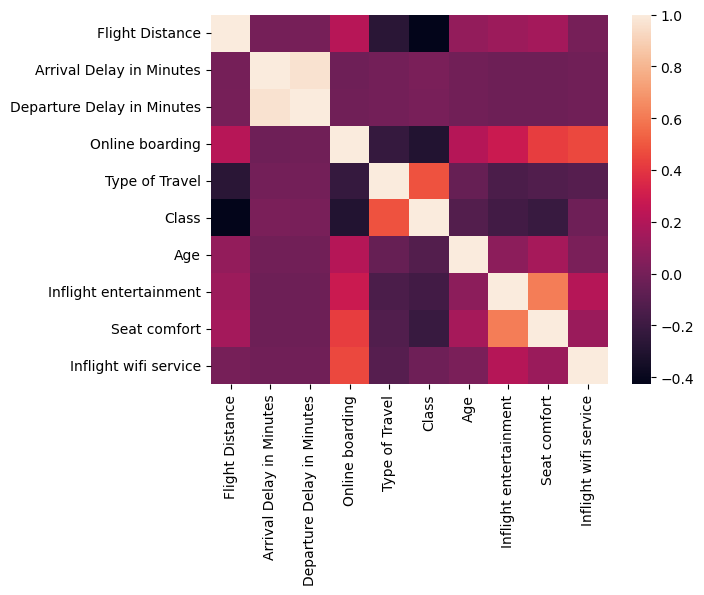

In [20]:
x1corr = x1.corr()
sns.heatmap(x1corr)

In [29]:
from sklearn.feature_selection import mutual_info_classif
classif =  mutual_info_classif(x,y)

In [30]:
print(classif)

[0.00548452 0.01489866 0.04751914 0.11555343 0.1375188  0.06294328
 0.16481302 0.00786116 0.05251538 0.01308243 0.02958059 0.2136319
 0.08240789 0.0947428  0.05874741 0.06420874 0.04494077 0.03439245
 0.04581737 0.05536313 0.0028003  0.00668005]


Gender                               0.005485
Customer Type                        0.014899
Age                                  0.047519
Type of Travel                       0.115553
Class                                0.137519
Flight Distance                      0.062943
Inflight wifi service                0.164813
Departure/Arrival time convenient    0.007861
Ease of Online booking               0.052515
Gate location                        0.013082
Food and drink                       0.029581
Online boarding                      0.213632
Seat comfort                         0.082408
Inflight entertainment               0.094743
On-board service                     0.058747
Leg room service                     0.064209
Baggage handling                     0.044941
Checkin service                      0.034392
Inflight service                     0.045817
Cleanliness                          0.055363
Departure Delay in Minutes           0.002800
Arrival Delay in Minutes          

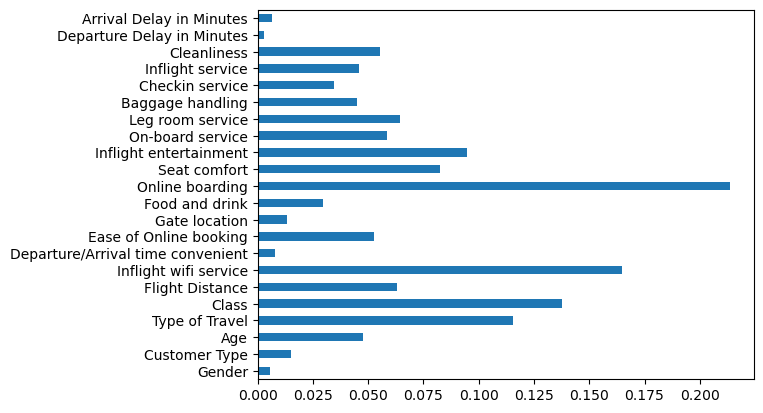

In [36]:
classif_feat = pd.Series(classif,data.columns[0:len(data.columns)-1])
print(classif_feat)
classif_feat.plot(kind='barh')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x1,y,test_size=0.33,random_state=0)


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform (x_test)

In [23]:
print(x_train.shape,x_test.shape)

(69615, 10) (34289, 10)


In [47]:
# from sklearn.preprocessing import MinMaxScaler
# l = MinMaxScaler()
# print(l)

MinMaxScaler()


# PCA 

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 2)
x_r=pca.fit(x).transform (x)

In [25]:
print(x_r)

[[-729.48598204    9.23991208]
 [-954.4706122   -16.19632835]
 [ -47.46652373  -21.17138178]
 ...
 [ 805.53580515   -6.29274664]
 [-189.47603089  -21.14539927]
 [ 533.52995381  -21.15041119]]
